In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')

In [3]:
new_df = df.sample(30000)

In [4]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [5]:
new_df.duplicated().sum()

0

is_duplicate
0    18852
1    11148
Name: count, dtype: int64
is_duplicate
0    62.84
1    37.16
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

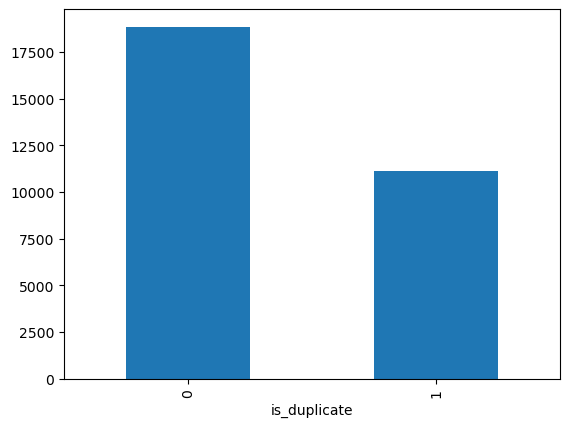

In [6]:
print(new_df['is_duplicate'].value_counts())
print((new_df['is_duplicate'].value_counts()/new_df['is_duplicate'].count())*100)
new_df['is_duplicate'].value_counts().plot(kind='bar')

In [7]:
new_df['q1_len']=new_df['question1'].str.len()
new_df['q2_len']=new_df['question1'].str.len()

In [8]:
new_df.head

<bound method NDFrame.head of             id    qid1    qid2  \
293333  293333  415078  415079   
77283    77283  131987  131988   
282738  282738  216147  110382   
88635    88635  114132   62970   
322331  322331   77058  362609   
...        ...     ...     ...   
263170  263170   31120  106701   
11130    11130   21518   21519   
368868  368868  499278  499279   
130716  130716  209722  209723   
355648  355648  484892  484893   

                                                question1  \
293333  What are some cool distributed systems project...   
77283   What happened to KM Nanavati after he was rele...   
282738            What is the best way to stop terrorism?   
88635               How does one simply fall out of love?   
322331  What can I do about an iPod that won't hold ch...   
...                                                   ...   
263170  How is Donald Trump a better choice than Hilla...   
11130       How can I create a WiFi hotspot in Windows 7?   
368868      

In [9]:
new_df['q1_num_word']=new_df['question1'].apply(lambda x: len(x.split(' ')))
new_df['q2_num_word']=new_df['question1'].apply(lambda x: len(x.split(' ')))

In [10]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word
293333,293333,415078,415079,What are some cool distributed systems project...,What are good open source distributed systems ...,0,61,61,10,10
77283,77283,131987,131988,What happened to KM Nanavati after he was rele...,What are some uses for Vmax and Km?,0,51,51,9,9
282738,282738,216147,110382,What is the best way to stop terrorism?,How do I stop terrorism?,1,39,39,8,8
88635,88635,114132,62970,How does one simply fall out of love?,How do I fall out of love with someone?,1,37,37,8,8
322331,322331,77058,362609,What can I do about an iPod that won't hold ch...,What should I do if my iPod Touch does not cha...,1,51,51,11,11


In [11]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(),row['question1'].split(' ')))
    w2 = set(map(lambda word: word.lower().strip(),row['question2'].split(' ')))
    return len(w1 & w2)

In [12]:
new_df['word_common'] = new_df.apply(common_words,axis=1)

In [13]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word,word_common
293333,293333,415078,415079,What are some cool distributed systems project...,What are good open source distributed systems ...,0,61,61,10,10,5
77283,77283,131987,131988,What happened to KM Nanavati after he was rele...,What are some uses for Vmax and Km?,0,51,51,9,9,1
282738,282738,216147,110382,What is the best way to stop terrorism?,How do I stop terrorism?,1,39,39,8,8,2
88635,88635,114132,62970,How does one simply fall out of love?,How do I fall out of love with someone?,1,37,37,8,8,4
322331,322331,77058,362609,What can I do about an iPod that won't hold ch...,What should I do if my iPod Touch does not cha...,1,51,51,11,11,5


In [14]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(),row['question1'].split(' ')))
    w2 = set(map(lambda word: word.lower().strip(),row['question2'].split(' ')))
    return len(len(w1) + len(w2))


In [15]:
new_df['total_words'] = new_df.apply(common_words,axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word,word_common,total_words
293333,293333,415078,415079,What are some cool distributed systems project...,What are good open source distributed systems ...,0,61,61,10,10,5,5
77283,77283,131987,131988,What happened to KM Nanavati after he was rele...,What are some uses for Vmax and Km?,0,51,51,9,9,1,1
282738,282738,216147,110382,What is the best way to stop terrorism?,How do I stop terrorism?,1,39,39,8,8,2,2
88635,88635,114132,62970,How does one simply fall out of love?,How do I fall out of love with someone?,1,37,37,8,8,4,4
322331,322331,77058,362609,What can I do about an iPod that won't hold ch...,What should I do if my iPod Touch does not cha...,1,51,51,11,11,5,5


In [16]:
new_df['word_share'] = round(new_df['word_common']/new_df['total_words'])
print(new_df.head())
print(new_df.isnull().sum())

            id    qid1    qid2  \
293333  293333  415078  415079   
77283    77283  131987  131988   
282738  282738  216147  110382   
88635    88635  114132   62970   
322331  322331   77058  362609   

                                                question1  \
293333  What are some cool distributed systems project...   
77283   What happened to KM Nanavati after he was rele...   
282738            What is the best way to stop terrorism?   
88635               How does one simply fall out of love?   
322331  What can I do about an iPod that won't hold ch...   

                                                question2  is_duplicate  \
293333  What are good open source distributed systems ...             0   
77283                 What are some uses for Vmax and Km?             0   
282738                           How do I stop terrorism?             1   
88635             How do I fall out of love with someone?             1   
322331  What should I do if my iPod Touch does not ch

In [17]:
new_df['word_share'].replace(0, np.nan, inplace=True)
new_df.isnull().sum()


id                 0
qid1               0
qid2               0
question1          0
question2          0
is_duplicate       0
q1_len             0
q2_len             0
q1_num_word        0
q2_num_word        0
word_common        0
total_words        0
word_share      1675
dtype: int64

In [18]:
ques_df = new_df[['question1','question2']]

In [19]:
ques_df.head()

,question1,question2
293333,What are some cool distributed systems project...,What are good open source distributed systems ...
77283,What happened to KM Nanavati after he was rele...,What are some uses for Vmax and Km?
282738,What is the best way to stop terrorism?,How do I stop terrorism?
88635,How does one simply fall out of love?,How do I fall out of love with someone?
322331,What can I do about an iPod that won't hold ch...,What should I do if my iPod Touch does not cha...


In [20]:
final_df = new_df.drop(columns= ['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(30000, 8)


,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word,word_common,total_words,word_share
293333,0,61,61,10,10,5,5,1.0
77283,0,51,51,9,9,1,1,1.0
282738,1,39,39,8,8,2,2,1.0
88635,1,37,37,8,8,4,4,1.0
322331,1,51,51,11,11,5,5,1.0


In [21]:
from sklearn.feature_extraction.text import CountVectorizer
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv= CountVectorizer(max_features = 3000)
q1_arr,q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [22]:
temp_df1 = pd.DataFrame(q1_arr,index=ques_df.index)
temp_df2 = pd.DataFrame(q2_arr,index=ques_df.index)
temp_df  = pd.concat([temp_df1,temp_df2],axis=1)
temp_df.shape
print(temp_df.columns)
# if we not change an type of column it will giv wan error while we fit the model
temp_df.columns = temp_df.columns.astype(str)

Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       2990, 2991, 2992, 2993, 2994, 2995, 2996, 2997, 2998, 2999],
      dtype='int64', length=6000)


In [23]:
final_df = pd.concat([final_df,temp_df],axis=1)
print(temp_df.columns)
temp_df.columns = temp_df.columns.astype(str)

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '2990', '2991', '2992', '2993', '2994', '2995', '2996', '2997', '2998',
       '2999'],
      dtype='object', length=6000)


In [24]:
print(final_df.isnull().sum())
final_df['word_share'].fillna(0, inplace=True)
print(final_df.isnull().sum())


is_duplicate    0
q1_len          0
q2_len          0
q1_num_word     0
q2_num_word     0
               ..
2995            0
2996            0
2997            0
2998            0
2999            0
Length: 6008, dtype: int64
is_duplicate    0
q1_len          0
q2_len          0
q1_num_word     0
q2_num_word     0
               ..
2995            0
2996            0
2997            0
2998            0
2999            0
Length: 6008, dtype: int64


In [33]:
# from sklearn.model_selection import train_test_split
# x_train,x_test,y_train,y_test = train_test_split(temp_df.iloc[:,0:-1].values,test_size=0.2,random_state=16)
from sklearn.model_selection import train_test_split

# Assuming 'temp_df' is your DataFrame
# The line below is corrected
x_train, x_test, y_train, y_test = train_test_split(final_df.iloc[:, 1:], 
                                                    final_df.iloc[:, 0], 
                                                    test_size=0.2, 
                                                    random_state=2)


In [32]:
# y_train.isnull().sum()
# y_train
#x_train.columns = x_train.columns.astype(str)
final_df.iloc[:, 0]

293333    0
77283     0
282738    1
88635     1
322331    1
         ..
263170    1
11130     0
368868    1
130716    1
355648    1
Name: is_duplicate, Length: 30000, dtype: int64

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
accuracy_score(y_test,y_pred)

0.7475

In [35]:
import pickle

pickle.dump(rf,open('model.pkl','wb'))
pickle.dump(cv,open('cv.pkl','wb'))

        q1_len  q2_len  q1_num_word  q2_num_word  word_common  total_words  \
202618      45      45            8            8            1            1   
16303       39      39            9            9            3            3   
52844       47      47           10           10            3            3   
394096      51      51           11           11            9            9   
19578       41      41            7            7            5            5   
...        ...     ...          ...          ...          ...          ...   
24352       54      54           10           10            0            0   
51581       41      41            7            7            2            2   
203249      30      30            6            6            4            4   
393401     118     118           22           22            3            3   
132363      57      57           10           10            5            5   

        word_share  0  1  2  ...  2990  2991  2992  2993  2994 

In [37]:
import pickle
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')  # Only required once

stop_words = stopwords.words('english')

# Save to a pickle file
with open('stopwords.pkl', 'wb') as f:
    pickle.dump(stop_words, f)


TypeError: validate_params() got an unexpected keyword argument 'prefer_skip_nested_validation'